# iris 데이터 주성분 분석 후 분류하기

In [84]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [85]:
from sklearn.model_selection import train_test_split
X, y = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=0)  

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [87]:
import numpy as np
cov_mat = np.cov(X_train_std.T)

In [88]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues : %s' % eigen_vals)

Eigenvalues : [2.8998938  0.98708902 0.13466453 0.01681419]


In [89]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.7180689405527698,
 0.2444220436332153,
 0.033345502524849045,
 0.0041635132891658525]

In [90]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.71806894, 0.96249098, 0.99583649, 1.        ])

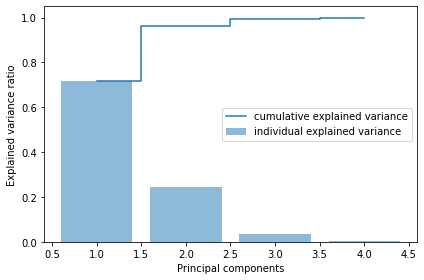

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [92]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(2.8998937983861857,
  array([ 0.53547007, -0.20428207,  0.58615942,  0.57267597])),
 (0.9870890223649079,
  array([-3.25785192e-01, -9.44860554e-01,  7.51890810e-04, -3.31960469e-02])),
 (0.134664529427275,
  array([-0.73207448,  0.23052807,  0.13736953,  0.62614166])),
 (0.016814188283169787,
  array([ 0.26683847, -0.11119432, -0.79846489,  0.52809741]))]

In [93]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 5.35470073e-01 -3.25785192e-01]
 [-2.04282071e-01 -9.44860554e-01]
 [ 5.86159424e-01  7.51890810e-04]
 [ 5.72675970e-01 -3.31960469e-02]]


In [94]:
X_train_pca = X_train_std.dot(w)

In [95]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

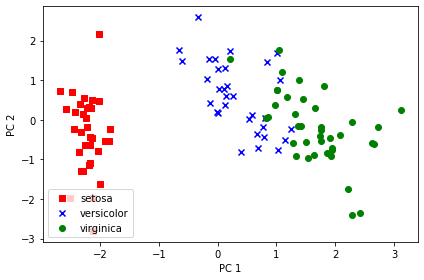

In [96]:
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], 
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('./figures/pca2.png', dpi=300)
plt.show()

In [97]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30))
mlp.fit(X_train_pca, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 30))

In [98]:
print(mlp.score(X_train_pca, y_train))

0.9333333333333333


In [99]:
X_test_pca = X_test_std.dot(w)
pred = mlp.predict(X_test_pca)
pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype='<U10')

In [100]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, pred, margins=True,
                               rownames=['Actual'], colnames=['Pred'])
confusion_matrix

Pred,setosa,versicolor,virginica,All
Actual,,,,
setosa,16,0,0,16
versicolor,0,15,3,18
virginica,0,2,9,11
All,16,17,12,45


In [101]:
print(mlp.score(X_test_pca, y_test))

0.8888888888888888


# PCA를 이용해서 얼굴 주성분 분석하기

In [102]:
# from imageio import imread
from skimage import io
import glob
imgs = []
for image_path in glob.glob("/content/drive/MyDrive/새싹sw-인공지능 서비스 개발자/CLASSROOM/CODE PDF/머신러닝/image/image/korean_beauty/*.png"):
#     image = imread(image_path)
    image = io.imread(image_path, as_gray=True)
    imgs.append(image)

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
import numpy as np
N = len(imgs) #이미지의 개수
images = np.array(imgs)

In [105]:
origin_shape = images.shape

In [106]:
origin_shape

(20, 35, 30)

In [107]:
fig_size = (origin_shape[2], origin_shape[1])
fig_size

(30, 35)

In [108]:
images.shape = (N, -1) 
images.shape

(20, 1050)

In [109]:
# 정규화 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
images_std = sc.fit_transform(images)
images_std

array([[-1.27907025, -1.03246327, -0.85222588, ...,  0.82443903,
         1.00502753,  0.96783713],
       [-0.81289044, -1.31169522, -0.95109702, ...,  0.81877975,
         0.94937534,  0.8834656 ],
       [-0.08074358, -0.51207572, -0.73079353, ...,  0.82449157,
         0.73738828,  0.9538411 ],
       ...,
       [-0.67518412, -0.73399219, -1.02074743, ...,  0.20354346,
        -1.03574422, -1.58445642],
       [-0.27350841,  0.77919797,  0.9078318 , ...,  0.91554841,
         1.0267314 ,  0.95947218],
       [-0.57464172, -0.17789985,  0.79295813, ..., -1.59625931,
        -0.71132477,  0.06839827]])

In [110]:
import numpy as np
cov_mat = np.cov(images_std)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [111]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

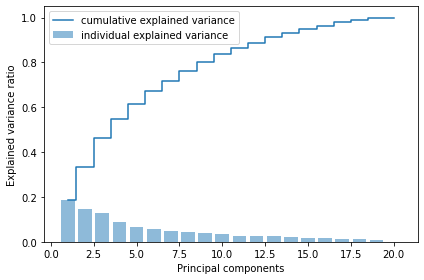

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, N+1), var_exp, alpha=0.5, align='center', 
        label='individual explained variance')
plt.step(range(1, N+1), cum_var_exp, where='mid', 
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [113]:
eigen_pairs = [(np.abs(eigen_vals[i]), 
                eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=False)

In [114]:
w = eigen_pairs[0][1][:, np.newaxis]
for i in range(1,N):
    w = np.hstack((w,eigen_pairs[i][1][:, np.newaxis]))


In [115]:
print('Matrix W:\n', w)

Matrix W:
 [[ 2.23606798e-01  4.46989033e-02  8.03024346e-02  5.83479090e-01
  -4.89451204e-02  4.78693338e-02  1.81854856e-01 -2.41865369e-01
  -2.80745674e-01  5.47235766e-03  1.33289581e-01  1.32605568e-01
  -5.92380380e-02  4.16253204e-01 -1.60422120e-02  1.98003755e-01
   1.97530286e-01  3.11766364e-01  7.21757597e-02  1.81619306e-01]
 [ 2.23606798e-01 -7.06270225e-01 -2.19226700e-01 -2.58563687e-01
   9.65851325e-03 -2.04970519e-01 -2.27740892e-01  1.08436712e-01
  -2.58982395e-02 -1.93310289e-01  2.57175419e-02  1.09091623e-01
   8.72181139e-02  1.03445320e-01  1.17290421e-01  1.87622207e-01
   7.90350802e-02  3.14128198e-01  3.83327137e-02  7.92130843e-02]
 [ 2.23606798e-01  2.86693730e-01  6.63908273e-02  4.69685230e-02
  -4.63098400e-02  2.40602117e-01  1.33638050e-01  4.84139447e-01
   3.90841448e-01 -1.84249017e-01 -3.66632239e-02  2.96945066e-01
   2.37907737e-02 -1.89080989e-01  2.75593874e-01  1.96135233e-02
   2.40987291e-02  3.93555221e-01  3.77334605e-02  5.60262082e-

In [116]:
images_pca = images_std.T @ w
images_pca.shape

(1050, 20)

In [117]:
result = images_pca.T
result

array([[-1.27403455e-15, -2.94107639e-16,  6.07083810e-16, ...,
         8.04366356e-17,  2.16123543e-15,  3.64709866e-15],
       [-1.79356711e-01, -2.23372832e-02, -6.07306229e-03, ...,
         4.05934131e-02,  4.56183971e-02,  1.11519402e-01],
       [-8.39842208e-01, -2.95128229e-01, -1.98750934e-01, ...,
        -7.55725338e-01, -6.91592851e-01, -6.94554169e-01],
       ...,
       [-1.79941549e+00, -1.66416412e+00, -1.79132166e+00, ...,
         2.07016564e+00,  2.03417259e+00,  1.93797791e+00],
       [-2.67281261e-01,  4.28811844e-01,  5.37148222e-01, ...,
        -1.21727181e+00, -1.57974752e+00, -1.38464373e+00],
       [-2.62195025e-01, -3.22855379e+00, -3.22610750e+00, ...,
         2.14626146e+00,  1.78128238e+00,  1.68331120e+00]])

In [118]:
result_img = sc.inverse_transform(result)
result_img.shape

(20, 1050)

In [119]:
result_img.shape = origin_shape
result_img.shape

(20, 35, 30)

In [120]:
# result_img = result_img.astype(np.uint8)

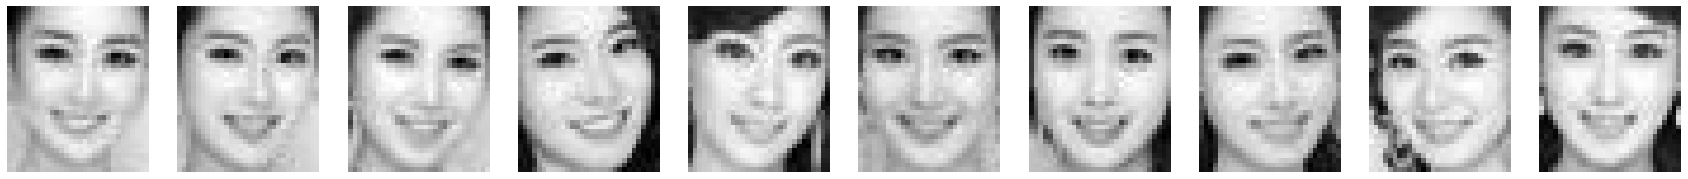

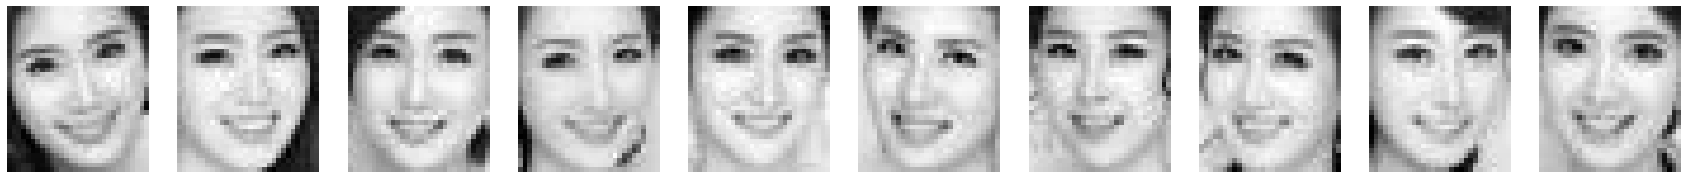

In [121]:
import matplotlib.pyplot as plt
%matplotlib inline
images.shape = origin_shape
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i + row*10], cmap="gray")
        plt.axis("off")
    plt.show()

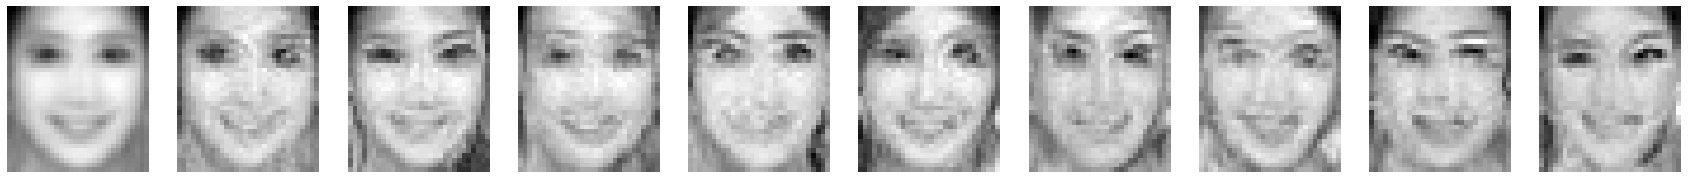

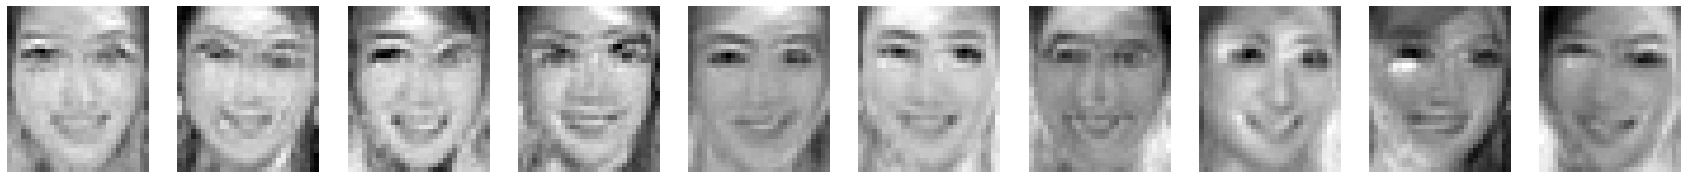

In [122]:
import matplotlib.pyplot as plt
%matplotlib inline
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(result_img[i + row*10], cmap="gray")
        plt.axis("off")
    plt.show()

# 분류 모형의 변수 선택

In [123]:
import pandas as pd
redwine = pd.read_csv('/content/drive/MyDrive/새싹sw-인공지능 서비스 개발자/CLASSROOM/CODE PDF/머신러닝/winequality-red.csv', delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [124]:
X = redwine.iloc[:, :-1];
y = redwine.iloc[:, -1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

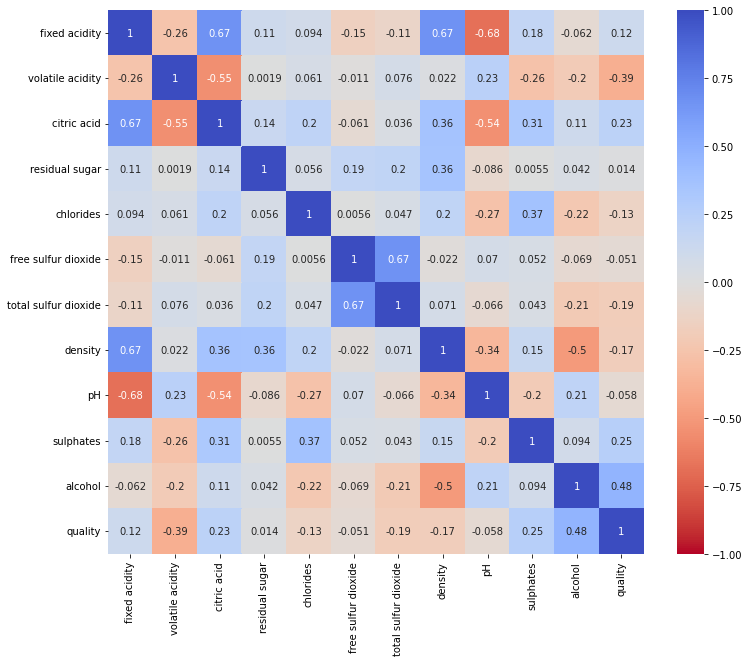

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(), annot=True, 
            vmin=-1, vmax=1, cmap="coolwarm_r")
plt.show()

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X, train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [127]:
rf_model.feature_importances_

array([0.07679351, 0.10421786, 0.07802557, 0.06573503, 0.07706915,
       0.06138852, 0.10841369, 0.09313385, 0.07038339, 0.10917441,
       0.15566503])

In [128]:
import numpy as np
np.sum(rf_model.feature_importances_)

1.0000000000000002

In [129]:
features = pd.DataFrame(data=np.c_[X.columns,
                                   rf_model.feature_importances_],
                        columns=["feature", "importance"])

In [130]:
features.sort_values(by="importance", ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.155665
1,sulphates,0.109174
2,total sulfur dioxide,0.108414
3,volatile acidity,0.104218
4,density,0.093134
5,citric acid,0.078026
6,chlorides,0.077069
7,fixed acidity,0.076794
8,pH,0.070383
9,residual sugar,0.065735


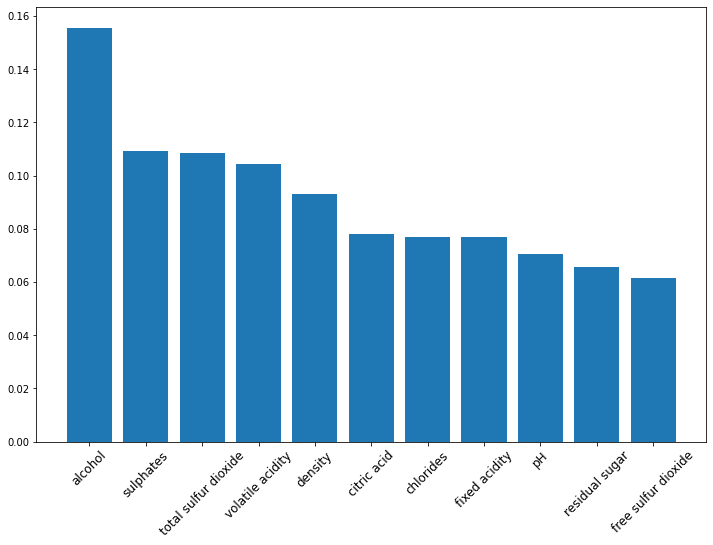

In [131]:
plt.figure(figsize=(12, 8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

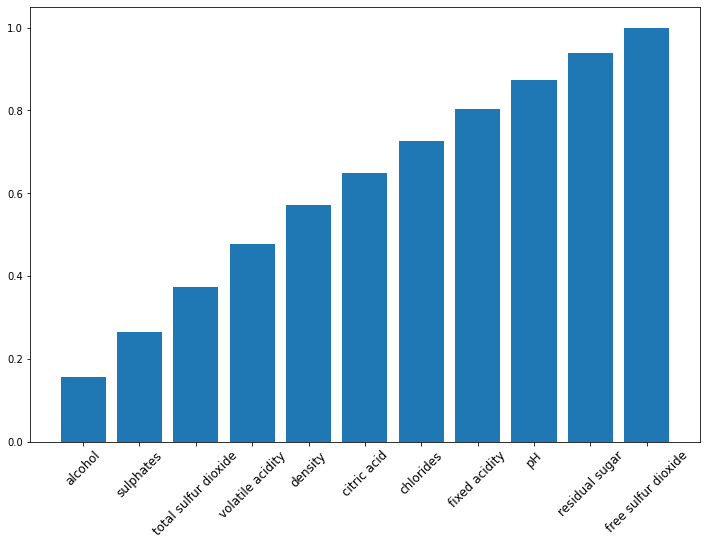

In [132]:
y_stack = np.cumsum(features.importance, axis=0)
plt.figure(figsize=(12, 8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select=5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [134]:
rfe_model.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True])

In [135]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data=np.c_[X.columns.values, 
                                       rfe_model.get_support()],
                            columns=["feature", "selected"])
features_rfe.sort_values(by="selected", ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [136]:
features.merge(features_rfe)

,feature,importance,selected
0,alcohol,0.155665,True
1,sulphates,0.109174,True
2,total sulfur dioxide,0.108414,True
3,volatile acidity,0.104218,True
4,density,0.093134,False
5,citric acid,0.078026,False
6,chlorides,0.077069,False
7,fixed acidity,0.076794,False
8,pH,0.070383,True
9,residual sugar,0.065735,False


In [137]:
import pickle
with open("rfe.model", "wb") as f:
    pickle.dump(rfe_model, f)

In [138]:
import pickle
with open("rfe.model", "rb") as f:
    rfe_model = pickle.load(f)

In [139]:
rfe_model.predict(test_X[:10])

array([5, 6, 8, 6, 6, 6, 6, 5, 5, 6])

In [140]:
test_y[:10].values

array([5, 6, 6, 6, 6, 6, 6, 5, 5, 5])

# 회귀모형의 변수 선택

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()

X = boston.data
y = boston.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [142]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr.coef_

array([ -7.24560918,   6.07841138,   1.61419961,   2.43955988,
       -10.43440297,  14.59135251,   0.33601219, -16.67429358,
         7.07346015,  -5.91072872,  -9.45138418,   2.55801415,
       -20.61456368])

In [144]:
import pandas as pd
import numpy as np
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_],
                        columns = ['feature', 'coef'])

In [145]:
features.sort_values("coef", ascending=False, inplace=True)
features

,feature,coef
8,RAD,7.073460145684005
1,ZN,6.07841138424351
11,B,2.5580141534965923
3,CHAS,2.439559875154853
5,RM,14.591352506822629
2,INDUS,1.6141996129903766
6,AGE,0.33601219093842577
10,PTRATIO,-9.451384184058618
0,CRIM,-7.24560917857892
9,TAX,-5.910728716948029


# SelectKBest

In [146]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [147]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [148]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [149]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

# 평균값 인코딩의 오버피팅 해결

In [150]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
sex_mean = titanic.groupby("sex")["survived"].mean()
titanic['sex_mean'] = titanic['sex'].map(sex_mean) 

In [151]:
titanic['sex_n_rows'] = titanic['sex'].map(titanic.groupby('sex').size())
global_mean = titanic["survived"].mean()
alpha = 0.7
def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha) / (n_rows + alpha)
titanic['sex_mean_smoothing'] = titanic.apply(
    lambda x:smoothing(x['sex_n_rows'], 
                       x['sex_mean']), axis=1)
titanic[['sex_mean', 'sex_mean_smoothing']].head()

,sex_mean,sex_mean_smoothing
0,0.188908,0.189144
1,0.742038,0.741241
2,0.742038,0.741241
3,0.742038,0.741241
4,0.188908,0.189144


In [152]:
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(titanic, test_size=0.2, 
                               random_state=42, shuffle=True)

# train -> train_new 로 될 예정. 미리 데이터프레임 만들어주기.
train_new = train.copy()
train_new[:] = np.nan
train_new['sex_mean'] = np.nan
from sklearn.model_selection import StratifiedKFold

# Kfold 만들어 주기.
X_train = train.drop("survived", axis=1)
Y_train = train["survived"]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 각 Fold iteration.
for tr_idx, val_idx in skf.split(X_train, Y_train):
    X_train, X_val = train.iloc[tr_idx], train.iloc[val_idx]

    # train set 에서 구한 mean encoded 값을 validation set 에 매핑해줌.
    means = X_val['sex'].map(X_train.groupby('sex')["survived"].mean())
    X_val['sex_mean'] = means
    train_new.iloc[val_idx] = X_val

# 폴드에 속하지못한 데이터들은 글로벌 평균으로 채워주기.
global_mean = train["survived"].mean()
train_new['sex'] = train_new['sex'].fillna(global_mean)
train_new[['sex', 'sex_mean']].head()

<ipython-input-152-ff6e4eeb827a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['sex_mean'] = means


,sex,sex_mean
331,male,0.184987
733,male,0.193029
382,male,0.177419
704,male,0.184000
813,female,0.751269


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effda7a14f0>,
      dtype=object)

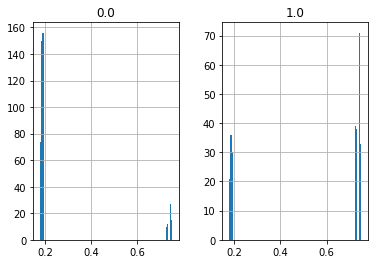

In [153]:
train_new.pivot_table(columns="survived", 
                      index=train_new.index, 
                      values='sex_mean').hist(bins=100)

In [154]:
cumsum = train.groupby('sex')["survived"].cumsum() - train["survived"] 
cumcnt = train.groupby('sex').cumcount() + 1 
train_new['sex_mean'] = cumsum / cumcnt

In [155]:
train_new[['sex','sex_mean']].tail()

,sex,sex_mean
106,female,0.733607
270,male,0.187097
860,male,0.186695
435,female,0.734694
102,male,0.186296


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7effda6184c0>,
      dtype=object)

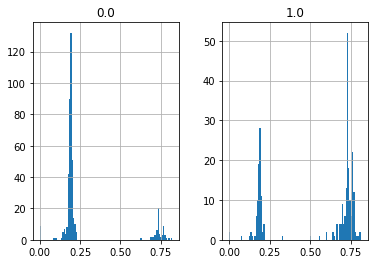

In [156]:
train_new.pivot_table(columns="survived", 
                      index=train_new.index, 
                      values='sex_mean').hist(bins=100)

### validation_curve

In [157]:
# red wine 데이터를 사용
import pandas as pd
redwine = pd.read_csv("http://javaspecialist.co.kr/pds/297", delimiter=';')
redwine_x = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1]

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(redwine_x, redwine_y, 
                                                    test_size=0.3)

In [159]:
X_train.shape

(1119, 11)

In [160]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(shuffle=False, random_state=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1, shuffle=False)

In [161]:
model.score(X_test, y_test)

0.5625

In [162]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(shuffle=False, random_state=1,
                      hidden_layer_sizes=(50,30))
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.575

In [163]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(shuffle=False, 
                      hidden_layer_sizes=(50,30,10), random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5625

In [164]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,), shuffle=False, random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5708333333333333

In [165]:
from IPython.core.display import display, HTML
display(HTML(
"""<style>
div.container { width:100% !important; }
div.CodeMirror {font-family: Consolas; font-size: 16pt;}
div.output { font-size: 16pt; font-weight: bold;}
div.input { font-family: Consolas; font-size: 16pt;}
div.prompt { min-width: 100px;}
</style>
"""))

In [166]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [167]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", 
    param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

CPU times: user 51.9 s, sys: 40.1 ms, total: 51.9 s
Wall time: 53.7 s


In [168]:
import numpy as np
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

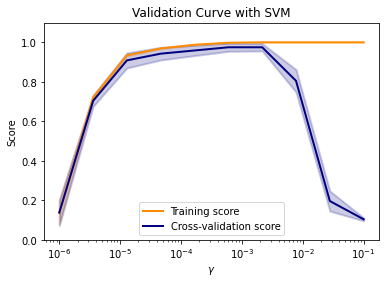

In [169]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [170]:
gamma = param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC
model = SVC(gamma=gamma).fit(X, y)
model

SVC(gamma=0.0021544346900318843)

In [171]:
model.score(X, y)

1.0

In [172]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.95833333, 0.94444444, 0.98050139, 0.99164345, 0.95264624])

# GridSearchCV

In [173]:
from __future__ import print_function
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

iris = load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([("pca", pca), 
                                  ("univ_select", selection)])

# 결합한 특징들을 transform() 데이터셋으로 사용합니다.
X_features = combined_features.fit(X, y).transform(X)
# print("Combined space has", X_features.shape[1], "features")

svm = SVC(kernel="linear")


In [174]:
%%time
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])

param_grid = dict(univ_select__k=[1, 2, 3, 4, 5],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, 
                           cv=5, verbose=10)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 1/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=0.967 total time=   0.0s
[CV 2/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 2/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=1.000 total time=   0.0s
[CV 3/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 3/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=0.833 total time=   0.0s
[CV 4/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 4/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=0.933 total time=   0.0s
[CV 5/5; 1/15] START svm__C=0.1, univ_select__k=1...............................
[CV 5/5; 1/15] END svm__C=0.1, univ_select__k=1;, score=1.000 total time=   0.0s
[CV 1/5; 2/15] START svm__C=0.1, univ_select__k=2...............................
[CV 1/5; 2/15] END svm__C=0.1, univ_select__k=2;

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.8/dist-packages

In [175]:
model = grid_search.best_estimator_

In [176]:
pred = model.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [177]:
model.get_params()

{'memory': None,
 'steps': [('univ_select', SelectKBest(k=3)),
  ('svm', SVC(C=1, kernel='linear'))],
 'verbose': False,
 'univ_select': SelectKBest(k=3),
 'svm': SVC(C=1, kernel='linear'),
 'univ_select__k': 3,
 'univ_select__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'svm__C': 1,
 'svm__break_ties': False,
 'svm__cache_size': 200,
 'svm__class_weight': None,
 'svm__coef0': 0.0,
 'svm__decision_function_shape': 'ovr',
 'svm__degree': 3,
 'svm__gamma': 'scale',
 'svm__kernel': 'linear',
 'svm__max_iter': -1,
 'svm__probability': False,
 'svm__random_state': None,
 'svm__shrinking': True,
 'svm__tol': 0.001,
 'svm__verbose': False}

In [179]:
from __future__ import print_function
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
import pandas as pd

redwine = pd.read_csv("/content/drive/MyDrive/새싹sw-인공지능 서비스 개발자/CLASSROOM/CODE PDF/머신러닝/winequality-red.csv", sep=";")
X, y = redwine.iloc[:,:-1], redwine.iloc[:,-1]

selection = SelectKBest(k=1)
svm = SVC(kernel="linear")

In [ ]:
%%time
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])

param_grid = dict(univ_select__k=[4, 5, 6, 7, 8, 9, 10, 11],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, 
                           cv=5, verbose=10, n_jobs=-1)
grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


### ParameterGrid

In [ ]:
# red wine 데이터를 사용
import pandas as pd
redwine = pd.read_csv("http://javaspecialist.co.kr/pds/297", delimiter=';')
redwine_x = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(redwine_x, redwine_y, 
                                                    test_size=0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()

In [ ]:
params = {"mlp__hidden_layer_sizes":[(20,), (50,), (50, 30), (50, 30, 10)],
          "mlp__activation": ["tanh", "relu"]}

In [ ]:
from sklearn.model_selection import ParameterGrid
param_grid = ParameterGrid(params)

In [ ]:
list(param_grid)

### GridSearchCV

In [ ]:
# red wine 데이터를 사용
import pandas as pd
redwine = pd.read_csv("http://javaspecialist.co.kr/pds/297", delimiter=';')
redwine_x = redwine.iloc[:,:-1]
redwine_y = redwine.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(redwine_x, redwine_y, 
                                                    test_size=0.3)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
# model_mlp.fit(redwine_x, redwine_y)

In [ ]:
from sklearn.decomposition import PCA
model_pca = PCA()

In [ ]:
from sklearn.feature_selection import SelectKBest
model_kbest = SelectKBest()

In [ ]:
from sklearn.pipeline import FeatureUnion
model_combined_features = FeatureUnion([("pca", model_pca),
                                        ("kbest", model_kbest)])

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("combined_features", model_combined_features),
                 ("mlp", model_mlp)])

In [ ]:
params = {"combined_features__pca__n_components": [2,4,6,8,10],
          "combined_features__kbest__k": [1,3,5,7,9],
          "mlp__hidden_layer_sizes":[(20,), (50,), (50, 30), (50, 30, 10)],
          "mlp__activation": ["tanh", "relu"]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, param_grid=params, 
                           cv=5, n_jobs=-1, verbose=10)

In [ ]:
grid_search.fit(redwine_x, redwine_y)

In [ ]:
model = grid_search.best_estimator_

In [ ]:
model.get_params()

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred

In [ ]:
pd.crosstab(y_test, pred)

In [ ]:
model.score(X_test, y_test)

### Over sampling

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1, n_classes=2,
                           weights=[0.99, 0.01], random_state=42)

In [ ]:
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y, s=100, edgecolors='k', linewidths=2, alpha=0.4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
model_rfc.fit(X_train, y_train)

In [ ]:
rfc_pred = model_rfc.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, rfc_pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_pred))

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio="auto", kind="regular")
X_resampled, y_resampled = sm.fit_sample(X, y)

In [ ]:
X_resampled.shape, y_resampled.shape

In [ ]:
plt.scatter(x=X_resampled[:,0], y=X_resampled[:,1], marker='o', c=y_resampled, 
            s=100, edgecolors='k', linewidths=2, alpha=0.1)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, 
                                                    shuffle=True, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(X_train, y_train)

In [ ]:
pred = rf_model.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                  stratify=y, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
sum(y_train), sum(y_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio="auto", kind="regular")
X_train_r, y_train_r = sm.fit_sample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(X_train_r, y_train_r)

In [ ]:
pred_r = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_r)
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_r))

In [ ]:
from sklearn.metrics import confusion_matrix
def get_f1score(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    precision = cm[1,1] / (cm[0,1]+cm[1,1])
    recall = cm[1,1] / (cm[1,0]+cm[1,1])
    f_measure = (2*precision*recall) / (precision+recall)
    return f_measure

In [ ]:
get_f1score(y_test_r, y_pred_rfc)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
def model_measure(model, x, y, test_size=0.3) :
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1,1] / (cm[0,1]+cm[1,1])
    recall = cm[1,1] / (cm[1,0]+cm[1,1])
    f_measure = (2*precision*recall) / (precision+recall)
#     print(f"precision: {precision}, recall: {recall}, f-measure: {f_measure}")
    return precision, recall, f_measure

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state=42), 
              X_resampled, y_resampled)

In [ ]:
from sklearn.svm import SVC
model_measure(SVC(random_state=42), X_resampled, y_resampled)

In [ ]:
from sklearn.neural_network import MLPClassifier
model_measure(MLPClassifier(hidden_layer_sizes=(50,)), X_resampled, y_resampled)

In [ ]:
from xgboost import XGBClassifier
model_measure(XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01),
              X_resampled, y_resampled)

In [ ]:
from lightgbm import LGBMClassifier
model_measure(LGBMClassifier(n_estimators=100), X_resampled, y_resampled)

In [ ]:
from sklearn.ensemble import VotingClassifier
model_rfc = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
model_xgb = XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01)
model_lgbm = LGBMClassifier(n_estimators=100)

model_voting = VotingClassifier(estimators=[("rfc", model_rfc), ("xgb", model_xgb), ("lgbm", model_lgbm)],
                                voting="hard")

In [ ]:
model_voting.fit(X_resampled, y_resampled)

In [ ]:
from lightgbm import LGBMClassifier
model_measure(model_voting, X_resampled, y_resampled)

In [ ]:
y_pred = model_voting.predict(X)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

In [ ]:
%%time
from xgboost import XGBClassifier
model_measure(XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01),
              X_train, y_train)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state=42), 
              X_train, y_train)

In [ ]:
del jk

In [ ]:
import jk

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
jk.model_measure(RandomForestClassifier(n_estimators=100, max_features=2, random_state=42),
                 X_train, y_train)

In [ ]:
%%time
from xgboost import XGBClassifier
jk.model_measure(XGBClassifier(max_depth=10, n_estimators=100, learning_rate=0.01),
                 X_train, y_train)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

# 데이터셋 생성
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

datasets = [make_moons(noise=0.3, random_state=0), # arc
            make_circles(noise=0.2, factor=0.5, random_state=1), # circle
            (X, y) # linear
            ]

figure = plt.figure(figsize=(8, 8))

# 데이터셋들 마다 반복
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 데이터와 검증 데이터로 나눔
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, 
                                                        random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # 데이터셋을 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+1)
    ax.set_title("Dataset %d" % (ds_cnt+1))

    # 학습 데이터의 산점도
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # 검증 데이터의 산점도
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k', marker='s', alpha=0.5)

    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+2)
    # 분류 모형 생성 및 예측
    model = MLPClassifier(alpha=1, max_iter=1000)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)

    # 결정 경계(decision boundary)를 그리기 위함
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # 채워진 등고선(contourf)을 이용해 결정 경계를 시각화
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # 학습 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_train[:, 0], X_train[:, 1], c=train_pred, cmap=cm_bright,
               edgecolors='k')
    # 검증 데이터의 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_test[:, 0], X_test[:, 1], c=test_pred, cmap=cm_bright,
               edgecolors='w', marker='s', alpha=0.5)

    ax.set_title("Neural Net Classification")
    ax.text(xx.max() - .3, yy.min() + .3, 
            ('Score %.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

plt.tight_layout()
plt.show()